In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plot
from sklearn.impute import SimpleImputer
import missingno as mano
import statsmodels.api as sm
from scipy.stats import norm
import pylab
from scipy.stats import kstest, norm
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
import seaborn as sns

#### F1: loading data in a dataframe (either CSV or Excel - can be generalized for databases)

In [2]:
def loading_data():
    filename = input("Please enter file name with extension : ")
    filetype = filename.split(".")
    if filetype[-1] == "xlsx":
        data = pd.read_excel(filename)
    else:
        data = pd.read_csv(filename)
    return data

data = loading_data()

Please enter file name with extension : nyc-rolling-sales-dirty.csv


C:\Users\Hp\Anaconda3\anaconda\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


#### F2: checking shape, column types, and see the first/last 'n' rows using head/tail (where n is one of the arguments of F2)

In [3]:
def data_info(n):
    dimensions = data.shape
    print ("Shape of the data is :",dimensions)
    print ("Number of rows :", dimensions[0])
    print ("Number of columns :", dimensions[1])
    
    #print ("\n")
    print ("\n Columns Types:\n",data.dtypes)
    
    print ("\nThe first",n,"rows of the data are:\n",data.head(n))
    print ("\nThe last",n,"rows of the data are:\n",data.tail(n))

data_info(5)

Shape of the data is : (84548, 22)
Number of rows : 84548
Number of columns : 22

 Columns Types:
 Unnamed: 0                          int64
BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                             float64
LOT                                object
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                         object
SALE DATE          

#### F3: remove unnecessary/useless columns (based on results of F2 and your background knowledge and the problem to be solved), e.g., identifiers, multiple primary keys, extra KPI like GMROI in sales which is the same for the whole year etc.

In [4]:
def del_column(data):
    n = int(input("How many columns you want to drop? "))
    for i in range(0,n):
        column_name = input("Enter column name : ")
        data.drop([column_name], axis=1, inplace=True)
    return data

del_column(data)

How many columns you want to drop? 2
Enter column name : Unnamed: 0
Enter column name : EASE-MENT


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,No Number,65000,NaN,NaN,10009.0,5,0,5,1633,6440,1900,2,C2,6625000,why
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,C7,NaN,,NaN,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,C7,NaN,,NaN,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,C4,NaN,,NaN,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,C2,NaN,,NaN,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,405.0,16,C4,NaN,,NaN,20,0,20,2581,9730,1900,2,C4,-,later
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,406.0,32,C4,NaN,,NaN,8,0,8,1750,4226,1920,2,C4,3192840,9/23/2016 0:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,407.0,18,C7,NaN,,NaN,44,2,46,5163,21007,1900,2,C7,-,7/20/2017 0:00
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,NaN,379.0,34,D5,NaN,,NaN,15,0,15,1534,9198,1920,2,D5,-,6/20/2017 0:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387.0,153,D9,NaN,,NaN,24,0,24,4489,18523,1920,2,D9,16232000,11/7/2016 0:00


#### F4: remove rows containing a particular value of a given column, e.g., in smoking_status column, I don't want to consider non-smokers in my ML problem so I remove all these rows.

In [5]:
def del_row():
    s_column = input("Enter the column name : ")
    s_row = input("Enter the value : ")
    
    index_names = data[ data[s_column] == s_row ].index
    data.drop(index_names,inplace=True)
    return data

del_row()

Enter the column name : SALE DATE
Enter the value : 0


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,No Number,65000,NaN,NaN,10009.0,5,0,5,1633,6440,1900,2,C2,6625000,why
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,C7,NaN,,NaN,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,C7,NaN,,NaN,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,C4,NaN,,NaN,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,C2,NaN,,NaN,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,405.0,16,C4,NaN,,NaN,20,0,20,2581,9730,1900,2,C4,-,later
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,406.0,32,C4,NaN,,NaN,8,0,8,1750,4226,1920,2,C4,3192840,9/23/2016 0:00
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,407.0,18,C7,NaN,,NaN,44,2,46,5163,21007,1900,2,C7,-,7/20/2017 0:00
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,NaN,379.0,34,D5,NaN,,NaN,15,0,15,1534,9198,1920,2,D5,-,6/20/2017 0:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387.0,153,D9,NaN,,NaN,24,0,24,4489,18523,1920,2,D9,16232000,11/7/2016 0:00


#### F5: determine the missing values in the whole dataset

In [6]:
def missing_values():
    data.isnull()
    data.replace(' ',np.nan, inplace=True)
    print (data.isnull().sum())
    
missing_values()

BOROUGH                               0
NEIGHBORHOOD                         30
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                745
BLOCK                                16
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                              45
APARTMENT NUMBER                  65496
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64


In [7]:
#CHECK ERROR VALUES
def error_values():
    temp = data.copy()
    for cols in temp.columns:
        temp[cols]=pd.to_numeric(temp[cols], errors='coerce') 
    temp.info()
    print (temp.describe().T)
    #return temp

error_values()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84548 entries, 0 to 84547
Data columns (total 20 columns):
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      0 non-null float64
BUILDING CLASS CATEGORY           0 non-null float64
TAX CLASS AT PRESENT              75692 non-null float64
BLOCK                             84532 non-null float64
LOT                               84538 non-null float64
BUILDING CLASS AT PRESENT         1 non-null float64
ADDRESS                           0 non-null float64
APARTMENT NUMBER                  3859 non-null float64
ZIP CODE                          84512 non-null float64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  58296 non-null float64
GROSS SQUARE FEET                 56936 non-null float64
YEAR BUILT                        84548 non-null int64
TAX CL

#### F6: analyze missing values of one or more columns using mano module

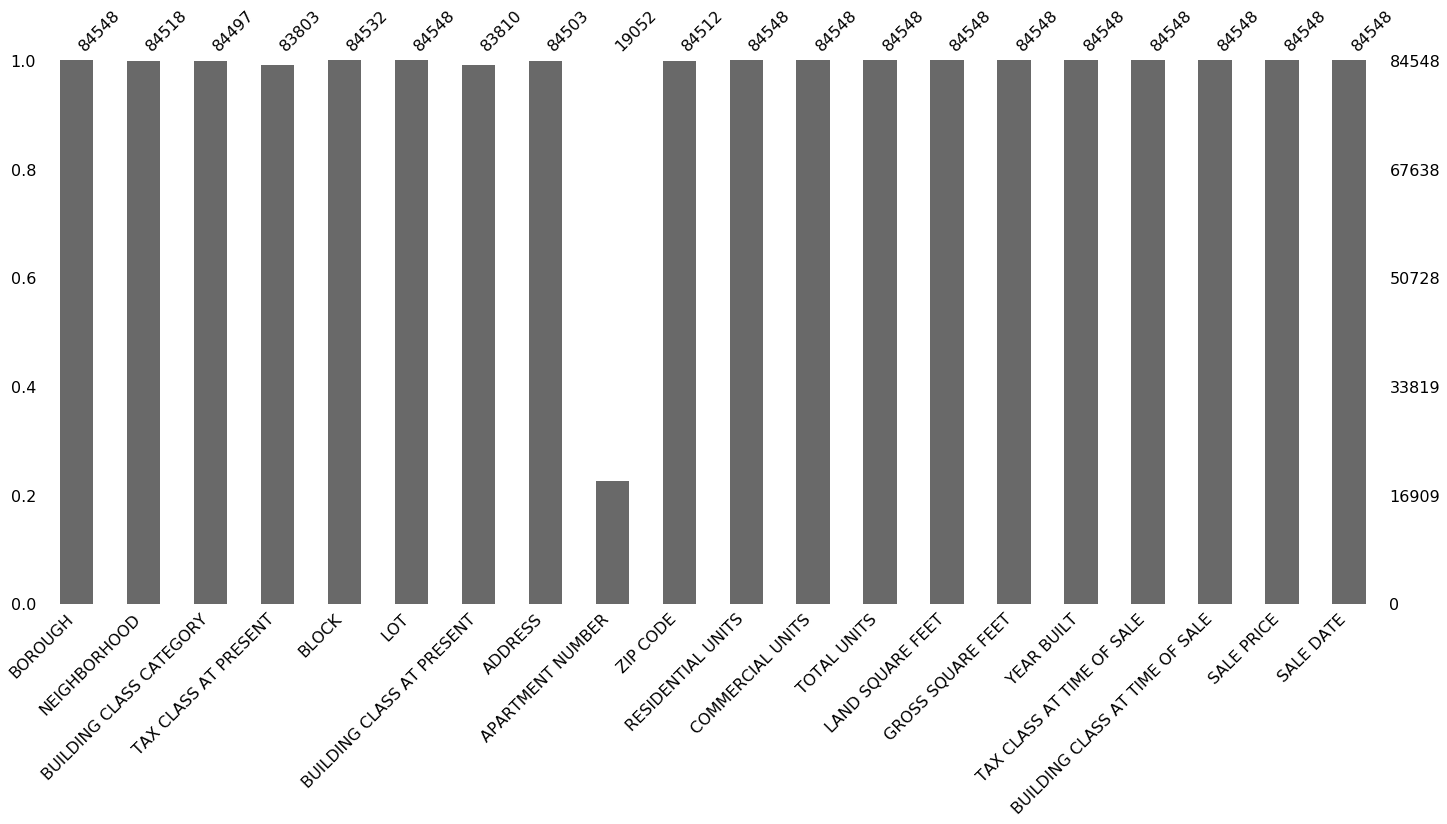

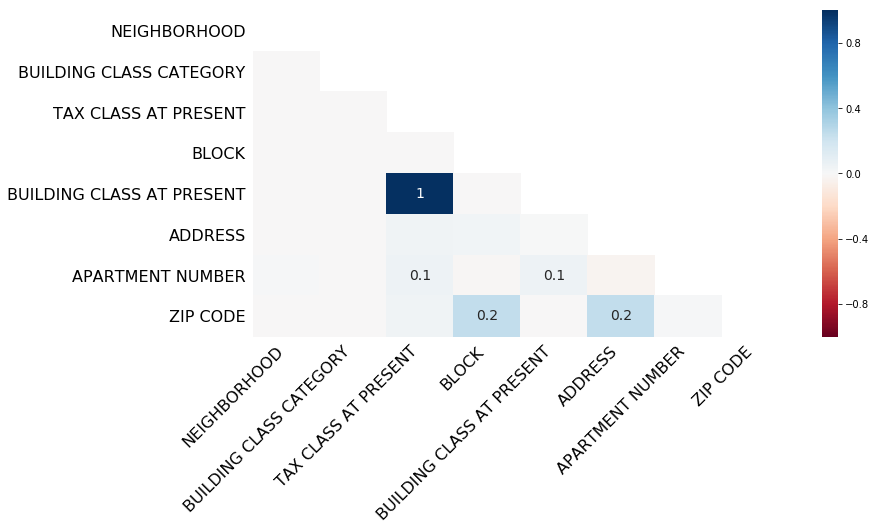

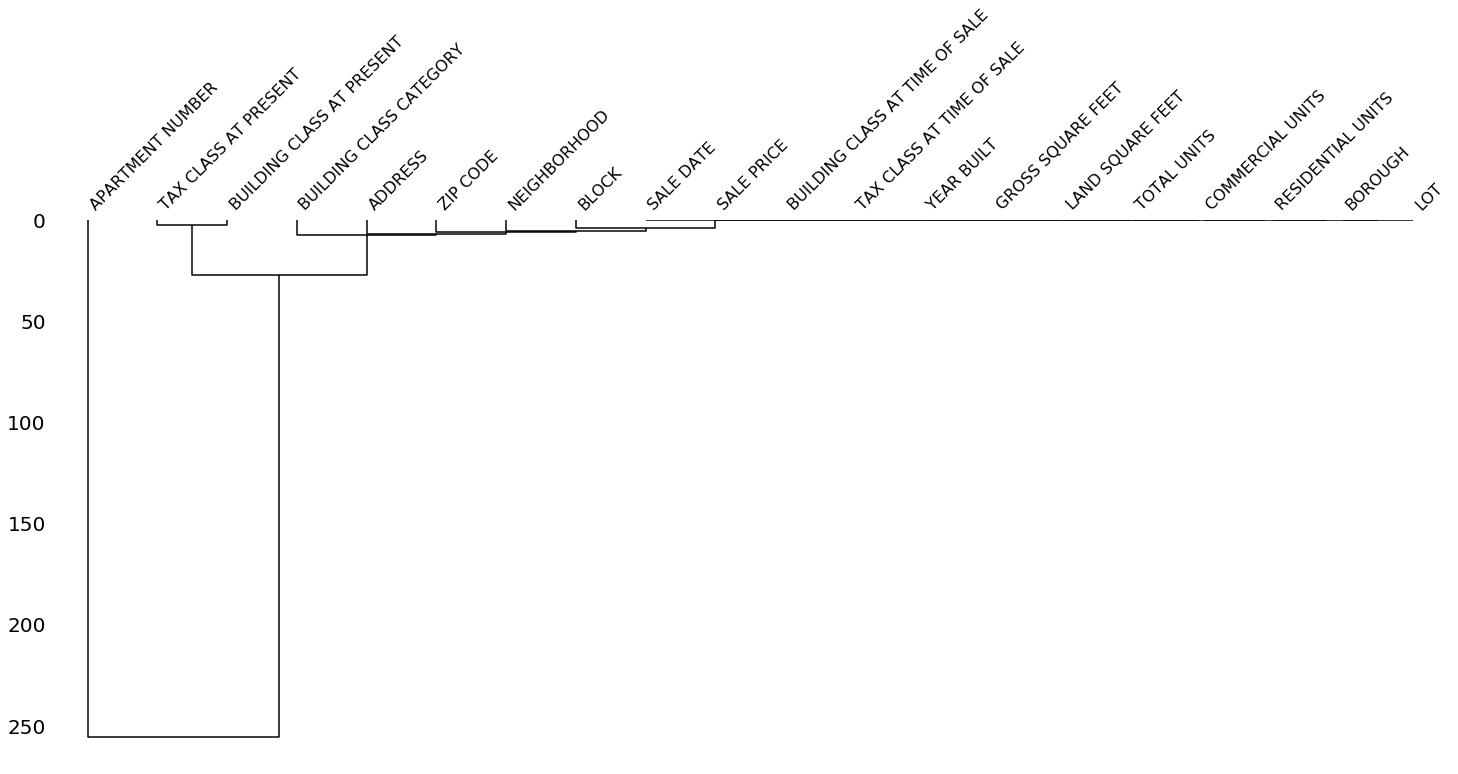

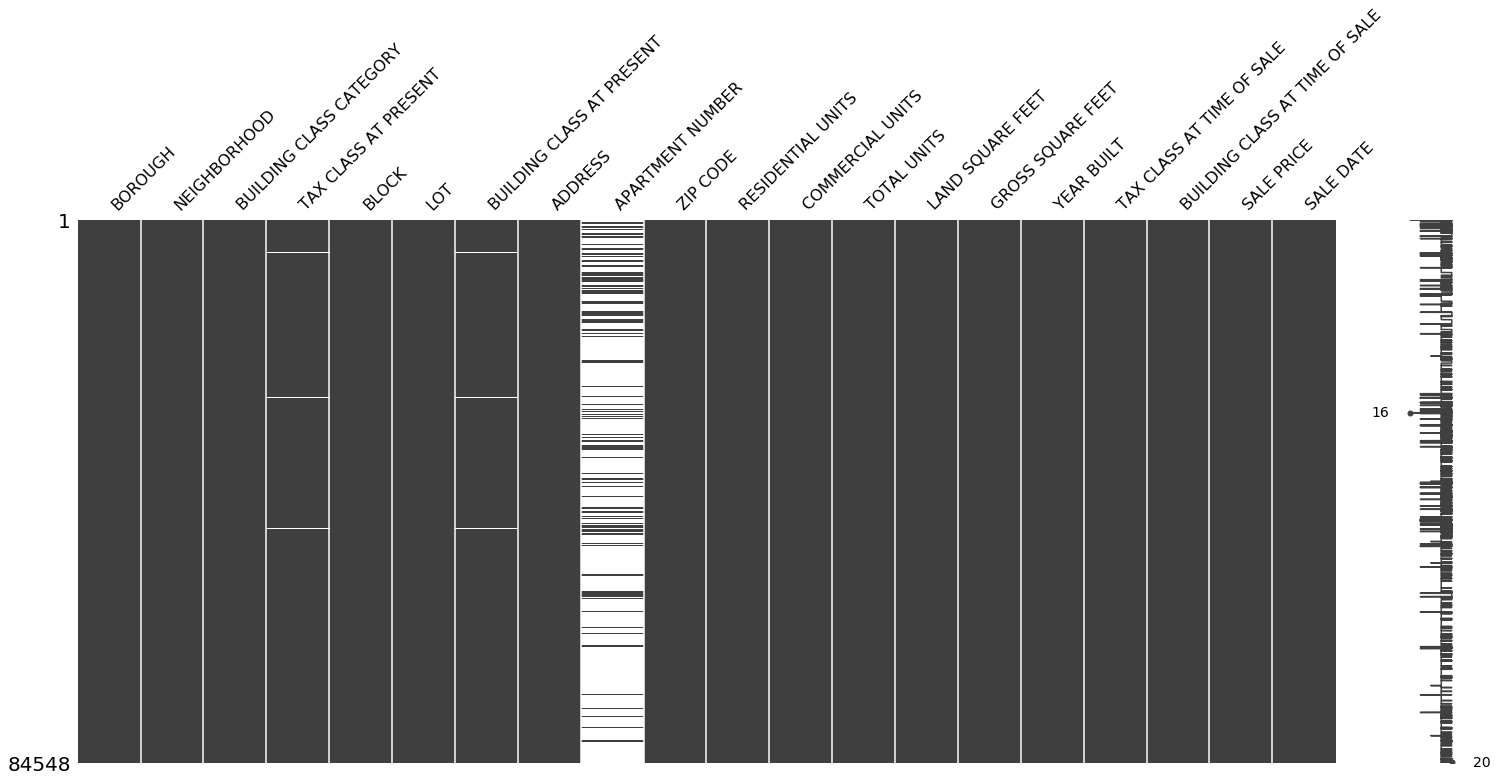

In [9]:
def mano_data():
    mano.bar(data)
    mano.heatmap(data, figsize=(12,6))
    mano.dendrogram(data)
    mano.matrix(data)
mano_data() 

#### F7: cater for missing values (input the column with missing value, and the method through which you want to cater for the missing values)

In [20]:
# Dropped the values where value is null
def drop_val(d_col):
    d_col = input("Enter the column name whose null values you want to delete : ")
    data = data.dropna(axis=0, subset=[d_col])
    return data

def missing_value_numeric():
    n = int(input("Enter the number of columns you want to convert into numeric : "))
    for i in range(0,n):
        col_name = input("Enter column name : ")
        for col in col_name:
            data[col_name] = pd.to_numeric(data[col_name], errors='coerce')
        mean_imputation = SimpleImputer(strategy='mean')
        data[[col_name]]= mean_imputation.fit_transform(data[[col_name]])
    print (data.isnull().sum())    
    return data.dtypes
    
def missing_value_catgorical():
    n = int(input("Enter the number columns you want to convert into categorical columns : "))
    for i in range(0,n):
        col_name = input("Enter column name : ")
        for col in col_name: 
            data[col_name] = data[col_name].astype("category")
        mode_imputation = SimpleImputer(strategy='most_frequent')
        data[[col_name]]= mode_imputation.fit_transform(data[[col_name]])
    print (data.isnull().sum())    
    return data.dtypes  
        
def missing_value_date():
    n = int(input("Enter the number columns you want to convert into date : "))
    for i in range(0,n):
        col_name = input("Enter column name : ")
        for col in col_name: 
            data[col_name]= pd.to_datetime(data[col_name], errors='coerce')
        
    print (data.isnull().sum())    
    return data.dtypes  

In [16]:
missing_value_numeric()

Enter the number of columns you want to convert into numeric : 9
Enter column name : BOROUGH
Enter column name : RESIDENTIAL UNITS
Enter column name : BLOCK
Enter column name : COMMERCIAL UNITS
Enter column name : LOT
Enter column name : TOTAL UNITS
Enter column name : LAND SQUARE FEET
Enter column name : GROSS SQUARE FEET
Enter column name : SALE PRICE
BOROUGH                               0
NEIGHBORHOOD                         30
BUILDING CLASS CATEGORY              51
TAX CLASS AT PRESENT                745
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                              45
APARTMENT NUMBER                  65496
ZIP CODE                             36
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX 

BOROUGH                           float64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                             float64
LOT                               float64
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                 float64
COMMERCIAL UNITS                  float64
TOTAL UNITS                       float64
LAND SQUARE FEET                  float64
GROSS SQUARE FEET                 float64
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                        float64
SALE DATE                          object
dtype: object

In [21]:
missing_value_catgorical()

Enter the number columns you want to convert into categorical columns : 10
Enter column name : NEIGHBORHOOD
Enter column name : BUILDING CLASS CATEGORY
Enter column name : TAX CLASS AT PRESENT
Enter column name : BUILDING CLASS AT PRESENT
Enter column name : ADDRESS
Enter column name : APARTMENT NUMBER
Enter column name : ZIP CODE
Enter column name : YEAR BUILT
Enter column name : BUILDING CLASS AT TIME OF SALE
Enter column name : TAX CLASS AT TIME OF SALE
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0

BOROUGH                           float64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                             float64
LOT                               float64
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                 float64
COMMERCIAL UNITS                  float64
TOTAL UNITS                       float64
LAND SQUARE FEET                  float64
GROSS SQUARE FEET                 float64
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                        float64
SALE DATE                          object
dtype: object

In [23]:
missing_value_date()

Enter the number columns you want to convert into date : 1
Enter column name : SALE DATE
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         3
dtype: int64


BOROUGH                                  float64
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                    float64
LOT                                      float64
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                 float64
RESIDENTIAL UNITS                        float64
COMMERCIAL UNITS                         float64
TOTAL UNITS                              float64
LAND SQUARE FEET                         float64
GROSS SQUARE FEET                        float64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                  int64
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                               float64
SALE DATE                         datetime64[ns]
dtype: object

#### F8: Function for numerical data analysis - includes histogram, boxplot, qqplot, describe, and statistical tests for normality

In [51]:
data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.000000,376.20806,65000,131-05 40TH ROAD,4,10009.0,5.0,0.0,5.0,1633.000000,6440.000000,1900,2,C2,6.625000e+06,NaT
1,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.000000,26.00000,C7,131-05 40TH ROAD,4,10314.0,28.0,3.0,31.0,4616.000000,18690.000000,1900,2,C7,1.276456e+06,2016-12-14
2,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,1,399.000000,39.00000,C7,131-05 40TH ROAD,4,10314.0,16.0,1.0,17.0,2212.000000,7803.000000,1900,2,C7,1.276456e+06,2016-12-09
3,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,1,402.000000,21.00000,C4,131-05 40TH ROAD,4,10314.0,10.0,0.0,10.0,2272.000000,6794.000000,1913,2,C4,3.936272e+06,2016-09-23
4,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,1,404.000000,55.00000,C2,131-05 40TH ROAD,4,10314.0,6.0,0.0,6.0,2369.000000,4615.000000,1900,2,C2,8.000000e+06,2016-11-17
5,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,1,405.000000,16.00000,C4,131-05 40TH ROAD,4,10314.0,20.0,0.0,20.0,2581.000000,9730.000000,1900,2,C4,1.276456e+06,NaT
6,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,1,406.000000,32.00000,C4,131-05 40TH ROAD,4,10314.0,8.0,0.0,8.0,1750.000000,4226.000000,1920,2,C4,3.192840e+06,2016-09-23
7,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,1,407.000000,18.00000,C7,131-05 40TH ROAD,4,10314.0,44.0,2.0,46.0,5163.000000,21007.000000,1900,2,C7,1.276456e+06,2017-07-20
8,1.0,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,1,379.000000,34.00000,D5,131-05 40TH ROAD,4,10314.0,15.0,0.0,15.0,1534.000000,9198.000000,1920,2,D5,1.276456e+06,2017-06-20
9,1.0,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387.000000,153.00000,D9,131-05 40TH ROAD,4,10314.0,24.0,0.0,24.0,4489.000000,18523.000000,1920,2,D9,1.623200e+07,2016-11-07


In [97]:
def num_col_analysis():
    
    global data
    
    plot.hist(data)
    
    fig = plot.figure(figsize =(15, 10)) 
    plot.boxplot(data) 
    plot.show()
    
    data = norm.rvs(size=1000)
    sm.qqplot(data, line='45')
    pylab.show()
    
    print ("Kolmogorov Smirnov test")
    data = norm.rvs(size=1000)
    ks_statistic, p_value = kstest(data, 'norm')
    print(ks_statistic, p_value)
    if p_value > 0.05:
        print ("Normal Distribution")
    else:
        print ("Data is not normally distributed")
        
    print ("Shapiro Wilk test")   
    data = norm.rvs(size=500)
    stat, p = shapiro(data)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print("Fail to reject H0 that is data is normal distributed")
    else:
        print("Reject H0 that is data is normally distributed")    

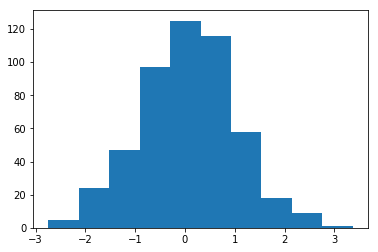

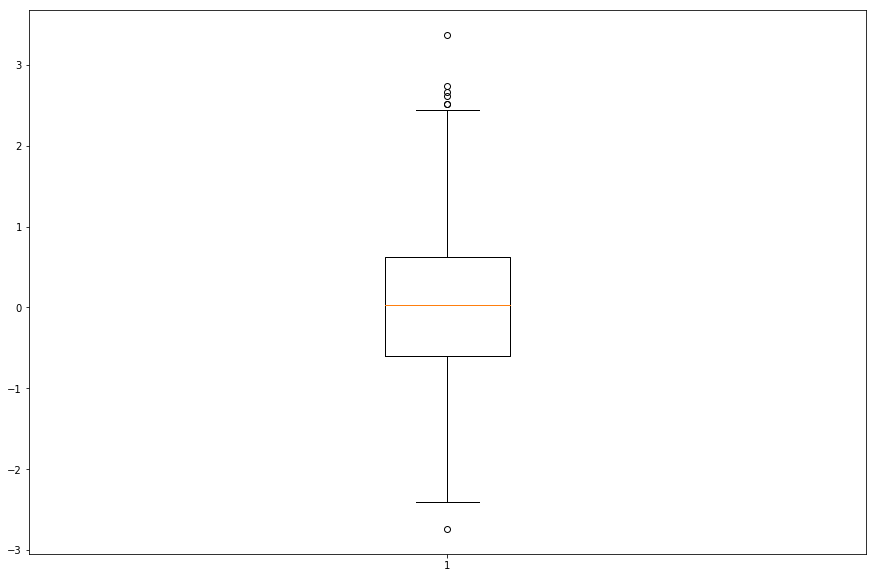

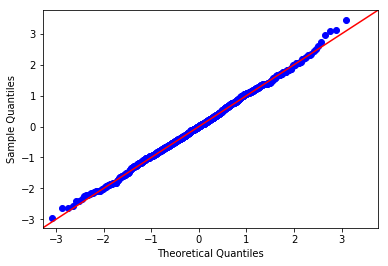

Kolmogorov Smirnov test
0.023381058128714216 0.6450752735129204
Normal Distribution
Shapiro Wilk test
Statistics=0.995, p=0.152
Fail to reject H0 that is data is normal distributed


In [98]:
num_col_analysis()

#### F9: Function for categorical data analysis - includes value counts, and bar charts

In [109]:
def cat_col_analysis(column_name):
    print(data[column_name].value_counts().count())
    print(data[column_name].value_counts())
    
    cat_count = data[column_name].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(cat_count.index, cat_count.values, alpha=0.9)
    plot.title('Frequency Distribution')
    plot.ylabel('Number of Occurrences', fontsize=12)
    plot.xlabel(column_name, fontsize=12)
    plot.show()
    
    c_labels = data[column_name].astype('category').cat.categories.tolist()
    c_counts = data[column_name].value_counts()
    sizes = [c_counts[var_cat] for var_cat in c_labels]
    fig1, ax1 = plot.subplots()
    ax1.pie(sizes, labels=c_labels, autopct='%1.1f%%', shadow=True) 
    ax1.axis('equal')
    plot.show()

    
    sizes = [c_counts[var_cat] for var_cat in c_labels]
    fig1, ax1 = plot.subplots()
    ax1.pie(sizes, labels=c_labels, autopct='%1.1f%%', shadow=True)
    ax1.axis('equal')
    plot.show()
    

#### F10: Function to change the type of any column (input col name and the type you want)

In [110]:
def data_type(col):
    print ("Press a to convert column type into the string")
    print ("Press 2 to convert column type into the category")
    print ("Press 3 to convert column type into the complex")
    print ("Press 4 to convert column type into the float")
    print ("Press 5 to convert column type into the integer")
    print ("Press 0 to convert column type into the date time")
    
    ans = int(input("Enter number for data type :"))
              
    if ans == 1:
        data[col] = data[col].astype(str)
    elif ans == 2:
        data[col] = data[col].astype("category")
    elif ans == 3:
        data[col] = data[col].astype(complex)
    elif ans == 4:
        data[col] = data[col].astype(float)
    elif ans == 5:
        data[col] = data[col].astype(int)
    else:
        data[col] = data[col].astype("datetime64[ns]")
              
    print(df.dtypes)

#### F11: Function to change the discretizations of a particular catergorical column, e.g., rename the values, remove space between value names etc.

In [111]:
def space(col_name):
    data[col_name] = data[col_name].str.replace(" ", "")

#### F12: Function for data analysis - extract year, month etc., subtract dates etc. (this function cannot be specified exactly so just add what you believe are the basic things

In [112]:
def ext_date():
    col=input("enter column name: ")
    
    data['Quarter'] = data[col].apply(lambda x: x.quarter)
    data['Year'] = data[col].apply(lambda x: x.year)
    data['Month'] = data[col].apply(lambda x: x.month)
    data['Week'] = data[col].apply(lambda x: x.week)
    data['Day'] = data[col].apply(lambda x: x.day)
            
    print(data)

#### F13: function to make a deep copy of a dataframe

In [113]:
def copy(path):
    data.copy(deep=True)    

#### F14: function to encode categorical into numerical (label, ordinal, or onehot)

In [114]:
def encoding(col_name):
    y = int(input("Press 1 for one hot encoding else press any number"))
    
    if y == 1:
        data = pd.get_dummies(data, columns=[col_name])
        mergedata = mergedata.drop([col_name],axis=1)
    else:
        data = data.apply(LabelEncoder().fit_transform) 
        mergedata = mergedata.drop(data.columns, axis=1)

In [115]:
from sklearn.metrics import classification_report, confusion_matrix
def apply_algo(task):
    
    if(task==1):
        clf=tree.DecisionTreeClassifier(random_state=0)
        iris=load_iris()
        #fit classification model
        clf=clf.fit(iris.data,iris.target)
        plot.figure(figsize=(15,10))
        tree.plot_tree(clf,filled='True')
        y_pred = clf.predict(X_test)
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
    elif(task==2):
        
        data = data.select_dtypes(exclude=['object'])
        X = data.drop('SALES',axis=1)   #Feature Matrix
        y = data['SALES']
        # create a regressor object
        regressor = DecisionTreeRegressor(random_state = 0) 
        # fit the regressor with X and Y data
        regressor.fit(X, y)
        # Predict 
        y_1 = regressor.predict(X_test)
        # print the predicted price
        print("Predicted value "% y_1) 
